# Import

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Table of content

* [Simple linear regression](#chapter1)
    * [Data](#section_1_1)
    * [Creation of the equation line](#section_1_2)
    * [Prediction](#section_1_3)

* [Multiple linear regression](#chapter2)
    * [Data](#section_2_1)
    * [Data preprocessing](#section_2_2)
    * [Correlation Matrix](#section_2_3)
    * [Model training concept](#section_2_5)
    * [Seasonal predictive model](#section_2_5)
    * [Non-seasonal predictive model](#section_2_6)
    * [Prediction of Number of PCs Sold](#section_2_7)


We are mandated by the company XYZ, which sells computers, the latter has been storing data for 5 years but does not know how to exploit them. XYZ would like to have an estimate of its PC sales to manage the stock and staff the teams accordingly. Let's see what we could do as a young Data Scientist.

# Simple linear regression <a id="chapter1"></a>

First, the company simply provides us with the number of PC sales over the 5 years. We will try to do a simple linear regression to try to predict the number of sales

In [135]:
df = pd.read_excel("Dataset/Data_computer_sells.xlsx")

In [136]:
df.head()

,Mois,Computers_number
0,1,1
1,2,4
2,3,5
3,4,7
4,5,6


## Data <a id="section_1_1"></a>

In [137]:
X = df.iloc[0:len(df),0]
Y = df.iloc[0:len(df),1] 

We simply display the data as a scatter plot to have a graphical representation of our data

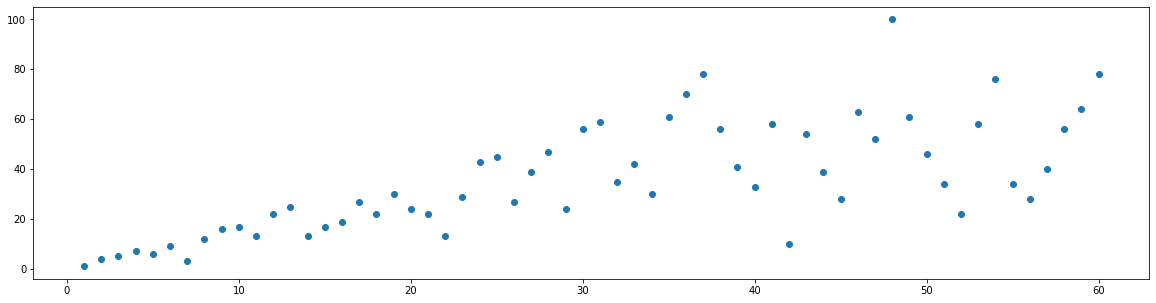

In [138]:
plt.figure(figsize=(20,5))
axes = plt.axes()
plt.scatter(X,Y) 
plt.show()

During a linear regression, we will find a line whose equation is an affine function of the form y=ax+b with a the slope and b the intercept. 
[Reminder for those who slept during the Math classes](https://fr.wikipedia.org/wiki/Fonction_affine)

The x of our function will correspond to the value we have on the x-axis

## Creating the line with equation <a id="section_1_2"></a>

In [139]:
from scipy import stats
pente, ordonnee_origine, r_value, p_value, std_err = stats.linregress(X, Y)
print("the equation on the right is an affine function of the form y = ax+b with a =", pente, ", et y =", ordonnee_origine)


the equation on the right is an affine function of the form y = ax+b with a = 0.9197277021394831 , et y = 7.664971751412434


We create here a function which will draw the line of equation y = 0.9197277021394831x + 7.664971751412434

In [140]:
def equationline(x):
    return pente * x + ordonnee_origine

We draw the line of equation y = 0.9197277021394831x + 7.664971751412434

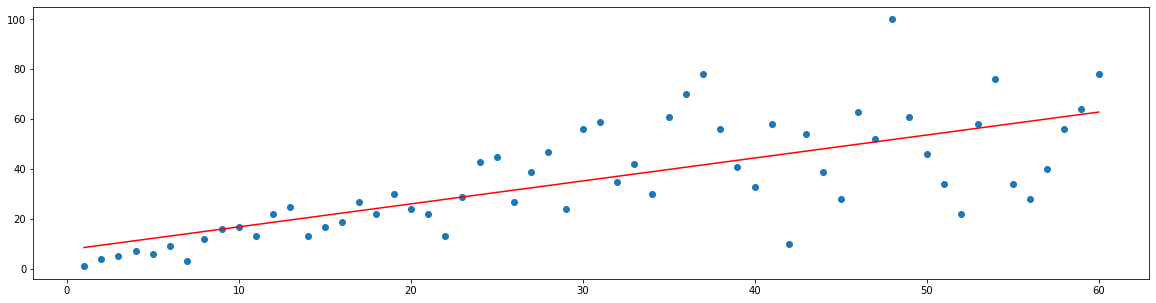

In [141]:
plt.figure(figsize=(20,5))
fitLine = equationline(X)
plt.scatter(X,Y) 
plt.plot(X, fitLine, c='r')

By replacing now the x for the value of a month on the x-axis we can have an idea of the number of computers sold, it is already a prediction of sales, not very accurate, but still prediction! 

The function below returns an estimation of the number of computers sold according to the month of the company

## Prediction <a id="section_1_3"></a>

In [142]:
def prediction (x):
    predicted_value = pente * x + ordonnee_origine
    return predicted_value

In [143]:
prediction(120)

118.03229600815041

In [144]:
prediction(1200)

1111.338214318792

In [145]:
def prediction_vs_reality (x):
    predicted_value = prediction (x)
    real_value = df['Computers_number'][x]
    return predicted_value, real_value

In [146]:
prediction_vs_reality(0)

(7.664971751412434, 1)

In [147]:
prediction_vs_reality(22)

(27.89898119848106, 29)

# Multiple linear regression <a id="chapter2"></a>

This dataset was created by myself and is accessible to all 

In [148]:
df = pd.read_excel("Dataset/Data_computer_sells_multivariate.xlsx")
df2 = df.drop(["Mois"], axis=1)

In [149]:
df2.head()

,Computers_number,Add_expense,Production_expense,Shop_number,mean_computer_buy,mean_weather,Population
0,1,10000,2000.000000,1,555685,16,64301000
1,4,12000,1998.000000,1,277262,-9,64307000
2,5,14000,1996.002000,1,191684,-6,64307000
3,7,12000,1994.005998,1,700569,1,64314000
4,6,11000,1992.011992,1,959654,14,64326000


Here we have a much denser data extract, with 7 columns: 
* The number of PCs sold by the company per month
* The price spent on advertising for the company per month (in €)
* The production cost of a PC for the company
* The number of stores in France
* The average number of computers bought in France
* The average temperature in France during the month 
* French population over the month


## Data <a id="section_2_1"></a>

We try to look at our data graphically, to observe as we did in the previous steps

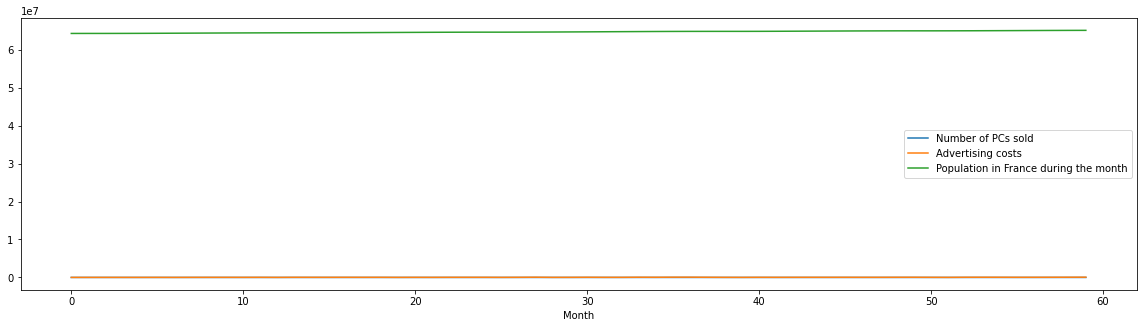

In [180]:
plt.figure(figsize=(20,5))
plt.xlabel('Month')
plt.plot(df['Computers_number'],label="Number of PCs sold ")
plt.plot(df['Add_expense'],label="Advertising costs")
plt.plot(df['Population'],label="Population in France during the month")
plt.legend()

As you can see on the graph, we don't see anything! This is due to the fact that **the data are not of the same order of magnitude**! 

Indeed the number of PC is a number between 1 and 100 while the French population is in millions.
Here is a method to solve this problem

## Data preprocessing, the min-max normalization <a id="section_2_2"></a>

In [151]:
std_scaler = MinMaxScaler().fit(df[["Computers_number","Add_expense","Production_expense","Shop_number","mean_computer_buy","mean_weather","Population"]])

In [152]:
df_std = std_scaler.transform(df[["Computers_number","Add_expense","Production_expense","Shop_number","mean_computer_buy","mean_weather","Population"]])

In [153]:
dataset = pd.DataFrame({'Computers_number': df_std[:, 0], 'Add_expense': df_std[:, 1],'Production_expense': df_std[:, 2],'Shop_number': df_std[:, 3],
                         'mean_computer_buy': df_std[:, 4],'mean_weather': df_std[:, 5],'Population': df_std[:, 6]})

We display again the same data as before but normalized 

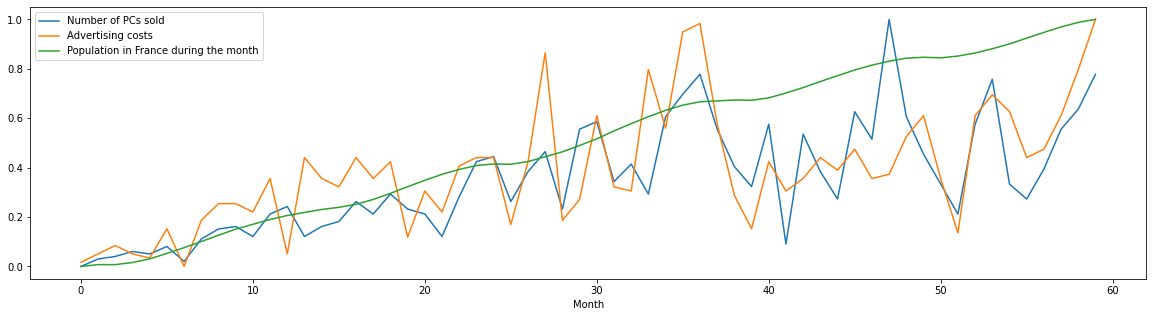

In [177]:
plt.figure(figsize=(20,5))
plt.xlabel('Month')
plt.plot(dataset['Computers_number'],label="Number of PCs sold ")
plt.plot(dataset['Add_expense'],label="Advertising costs")
plt.plot(dataset['Population'],label="Population in France during the month")
plt.legend()

We can see similarities in the data just graphically. 

However, a simple suspicion is not enough, we will have to know for sure! 

## Matrice de corrélation <a id="section_2_3"></a>

We use here the [Pearson correlation](https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques) to study the linear correlation between our variables

<AxesSubplot:>

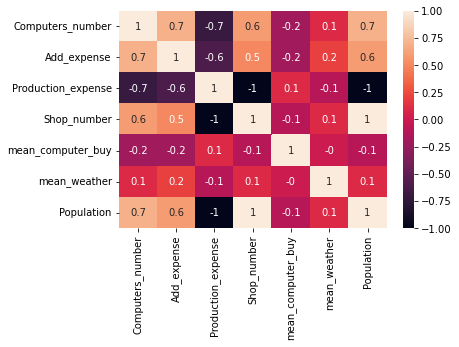

In [155]:
matrice_corr = df2.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

We notice that 4 variables are very correlated to our Computers_number variable that we want to try to predict: Add_expense, Production_expense, Shop_number and Population.  
So we have 4 variables that we can use to predict our sales number.

It's time to train our model!

## Train the model <a id="section_2_4"></a>

For the training of our model, we have constituted 2 distinct datasets, the dataset that will allow our model to train, in a second time the validation dataset, which will be used to confirm that our model has learned concepts and has not copied our training data and this allows us to avoid [overfitting (overlearning)](https://fr.wikipedia.org/wiki/Overlearning)

## Seasonal predictive model <a id="section_2_5"></a>

In [156]:
X=pd.DataFrame(np.c_[df2['Add_expense'],
                     df2['Production_expense'],
                     df2['Shop_number'],
                    ],
               
                     columns = ['Add_expense',
                                'Production_expense',
                                'Shop_number',
                                 ])

In [157]:
Y=df2.Computers_number

In [158]:
X_train = pd.DataFrame({'Add_expense': df2['Add_expense'][0:45], 
                        'Production_expense': df2['Production_expense'][0:45],
                        'Shop_number': df2['Shop_number'][0:45],
                       })


X_test =  pd.DataFrame({'Add_expense': df2['Add_expense'][45:60], 
                        'Production_expense': df2['Production_expense'][45:60],
                        'Shop_number': df2['Shop_number'][45:60],
                       })
print(X_train.shape)
print(X_test.shape)

(45, 3)
(15, 3)


In [159]:
Y_train = Y[0:45]
Y_test = Y[45:60]
print(Y_train.shape)
print(Y_test.shape)

(45,)
(15,)


In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

To check the reliability of our model, we will use 2 evaluation means, the RMSE and the R2 score on the learning data and on the test data. R2 is a measure of the quality of the prediction of a linear regression and RMSE is the average of the differences between the actual and predicted data.

In [161]:
from sklearn.metrics import r2_score

y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The performance of the model on the learning base")
print("RMSE = {}".format(rmse))
print(' R2 = {}'.format(r2))
print('\n')
 
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('The performance of the model on the test basis')
print("RMSE = {}".format(rmse))
print('R2 = {}'.format(r2))

The performance of the model on the learning base
RMSE = 10.024662905892042
 R2 = 0.7264063121293312


The performance of the model on the test basis
RMSE = 18.415002801874078
R2 = 0.17820612795993596


In [162]:
predict=[]
real=[]

In [163]:
#allows you to store the actual and predicted values on the drive 
for i in range (0,Y_train.shape[0]):
    predict.append(y_train_predict[i])
    real.append(Y_train.values[i])

In [164]:
#stores the actual and predicted values on the validation 
for i in range (0,Y_test.shape[0]):
    predict.append(y_test_predict[i])
    real.append(Y_test.values[i])

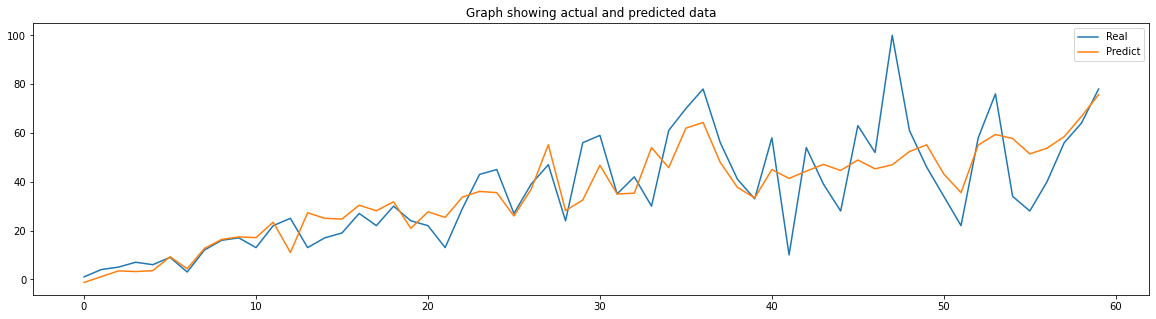

In [165]:
plt.figure(figsize=(20,5))
plt.plot(real, label='Real')
plt.plot(predict, label='Predict')
plt.title("Graph showing actual and predicted data")
plt.legend()

## Non-seasonal predictive model <a id="section_2_6"></a>

Same method except that here our test dataset will be constituted with random values of our base dataset

In [166]:
from sklearn.model_selection import train_test_split
#Ici on ne veut pas se baser sur la saisonnalité on va donc constituer nos datasets d'entrainement et de validation aléatoirement 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(45, 3)
(15, 3)
(45,)
(15,)


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

LinearRegression()

In [168]:
from sklearn.metrics import r2_score

y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The performance of the model on the learning base")
print("RMSE = {}".format(rmse))
print(' R2 = {}'.format(r2))
print('\n')
 
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print('The performance of the model on the test basis')
print("RMSE = {}".format(rmse))
print('R2 = {}'.format(r2))

The performance of the model on the learning base
RMSE = 13.363531528458047
 R2 = 0.6780182191834483


The performance of the model on the test basis
RMSE = 9.778082641533137
R2 = 0.6708621093551618


In [169]:
predict=[]
real=[]

In [170]:
 for i in range (0,Y_train.shape[0]):
    predict.append(y_train_predict[i])
    real.append(Y_train.values[i])

In [171]:
for i in range (0,Y_test.shape[0]):
    predict.append(y_test_predict[i])
    real.append(Y_test.values[i])

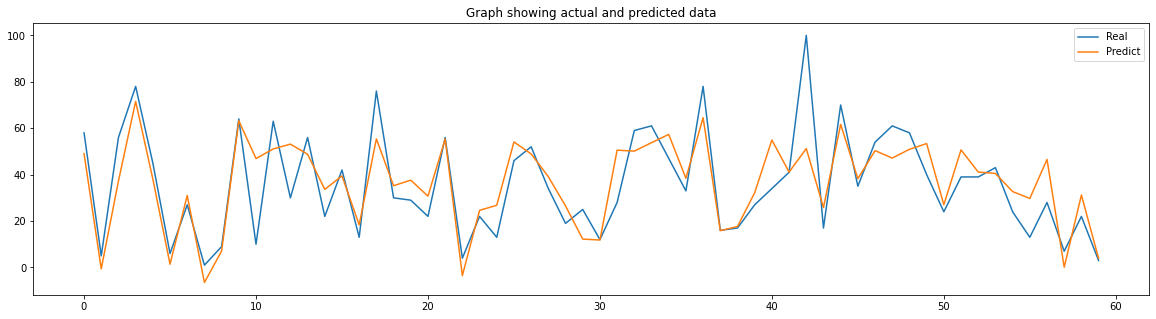

In [172]:
plt.figure(figsize=(20,5))
plt.plot(real, label='Real')
plt.plot(predict, label='Predict')
plt.title("Graph showing actual and predicted data")
plt.legend()

## Predicting the number of PCs sold <a id="section_2_7"></a>

Once we have chosen our model, we will now be able to predict the number of PCs sold according to our variables chosen at the beginning:    
Add_expense, Production_expense, Shop_number and Population.

In [173]:
Add_expense = 68000
Production_expense = 1885
Shop_number = 15

In [174]:
lmodellineaire.predict([[Add_expense, Production_expense, Shop_number]])[0]

71.88075645274375

We get a result of about 72 vs 78 in our dataset so we have a not totally absurd result with a margin of error of about 10%, but we can make predictions now with values that we never had for example:  

We simulate the increase of the add expense of 20K € and the number of shop from 15 to 17 and we decrease the production cost of 100 €.

In [175]:
Add_expense = 88000
Production_expense = 1835
Shop_number = 17

In [176]:
lmodellineaire.predict([[Add_expense, Production_expense, Shop_number]])[0]

120.18072275841041

We observe that with these modifications, the models estimate that we should be able to reach a result of about 120 PCs sold during the month.